Executive Summary of EDA & Visualizations

**Dataset Overview**
•	Size: ~31,979 observations, 18 features (mix of categorical & numeric).
•	Target Variable: HeartDisease (Yes/No, converted to binary).
•	Missing Data: No missing values across features.
•	Balance Issue: Target variable is imbalanced — majority are "No".


**Key Numerical Features**
•	BMI
o	Most participants: BMI 20–40.
o	HeartDisease more prevalent at BMI ≥ 30.
o	Outliers detected up to ~95.
•	PhysicalHealth
o	Heavy spike at 0 (many report no poor physical health days).
o	Strong association with HeartDisease: higher poor-health days → higher disease rate.
•	MentalHealth
o	Many at 0, no clear trend.
o	Weak link to HeartDisease.
•	SleepTime
o	Most clustered 6–9 hrs.
o	No strong relationship with HeartDisease.

**Categorical Feature Insights**
•	AgeCategory: Older groups → much higher HeartDisease rate.
•	Sex: Males show higher prevalence than females.
•	Stroke: Strong positive association with HeartDisease.
•	DiffWalking (Difficulty Walking): Strong positive association.
•	GenHealth: Clear gradient — “Poor” health → highest HeartDisease rate.
•	Diabetic: Strong link, especially full diabetes (vs borderline or none).
•	KidneyDisease: High association with HeartDisease.
•	SkinCancer: Elevated risk, but less strong than stroke/kidney.
•	Smoking: Smokers show slightly higher HeartDisease rate.
•	AlcoholDrinking: Slightly lower rate among drinkers (may reflect confounding).
•	Race: Some variation; American Indian/Alaskan Native and White slightly higher.
•	Asthma: Small positive link.

**Correlation Analysis**
•	Top correlated with HeartDisease:
o	PhysicalHealth (0.18)
o	BMI (0.06)
o	MentalHealth (0.03)
o	SleepTime (~0, no relationship).
•	Overall: Correlations weak; nonlinear patterns likely more useful.

**Modeling (Logistic Regression Baseline)**
•	Accuracy ≈ 91%, but driven by class imbalance.
•	Recall for HeartDisease = very low (~11%), meaning the model misses most positives.
•	AUC ~0.83 → fair discrimination, but not reliable for minority class.
•	Indicates need for resampling (SMOTE), feature engineering, and nonlinear models (RF/XGBoost).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#read in data
df = pd.read_csv('2020_cleaned_reduced.csv')
print(df.head())
print(df['HeartDisease'].unique())

FileNotFoundError: [Errno 2] No such file or directory: '2020_cleaned_reduced.csv'

In [78]:
import pandas as pd

# Load
df = pd.read_csv('/content/sample_data-2.csv')

# Quick shape + column types summary
n_rows, n_cols = df.shape
dtype_counts = df.dtypes.value_counts().to_dict()

# Missingness
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# Target distribution
target = 'HeartDisease'
target_counts = df[target].value_counts()
target_rate = (target_counts / target_counts.sum()).rename('proportion').round(3)

# Basic numeric profile (only the 4 numeric cols to avoid a huge table)
num_cols = df.select_dtypes(include='number').columns.tolist()
desc_num = df[num_cols].describe().T[['count','mean','std','min','25%','50%','75%','max']].round(3)

# Categorical cardinality (top 10)
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_card = pd.Series({c: df[c].nunique() for c in cat_cols}).sort_values(ascending=False)

print(f"Shape: {n_rows:,} rows × {n_cols} columns")
print(f"dtypes: {dtype_counts}")

print("\nTarget distribution (counts):")
print(target_counts.to_string())
print("\nTarget distribution (proportions):")
print(target_rate.to_string())

if not missing.empty:
    print("\nColumns with missing values:")
    print(missing.to_string())
else:
    print("\nMissing values: none")

print("\nNumeric summary (key columns):")
display(desc_num)

print("\nCategorical cardinality (top 10):")
display(cat_card.head(10))


Shape: 31,979 rows × 18 columns
dtypes: {dtype('O'): 14, dtype('float64'): 4}

Target distribution (counts):
HeartDisease
No     29242
Yes     2737

Target distribution (proportions):
HeartDisease
No     0.914
Yes    0.086

Missing values: none

Numeric summary (key columns):


,count,mean,std,min,25%,50%,75%,max
BMI,31979.0,28.320,6.311,12.02,24.03,27.34,31.44,94.66
PhysicalHealth,31979.0,3.379,7.973,0.00,0.00,0.00,2.00,30.00
MentalHealth,31979.0,3.860,7.895,0.00,0.00,0.00,3.00,30.00
SleepTime,31979.0,7.093,1.444,1.00,6.00,7.00,8.00,24.00



Categorical cardinality (top 10):


,0
AgeCategory,13
Race,6
GenHealth,5
Diabetic,4
HeartDisease,2
Smoking,2
Sex,2
DiffWalking,2
Stroke,2
AlcoholDrinking,2


Dataset Overview (one-time summary)


Rows/Columns: ~32k × 18; mix of numeric (BMI, PhysicalHealth, MentalHealth, SleepTime) and categorical features.


Target: HeartDisease (Yes/No); imbalanced with a large majority “No”.
Missingness: None detected.


Numerics (quick profile):
BMI centered ~28 (typical range 20–40; outliers present).


Physical/MentalHealth heavily spiked at 0 days.


SleepTime centered ~7 hrs (most between 6–9).


Categoricals: Moderate cardinality; suitable for one-hot encoding.

In [79]:
# Bin BMI
age_bins = pd.cut(df['BMI'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

In [ ]:
#Binary encode HeartDisease
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})

Distribution of the target variable 'HeartDisease':
HeartDisease
No     29242
Yes     2737
Name: count, dtype: int64
----------------------------------------------------------------------


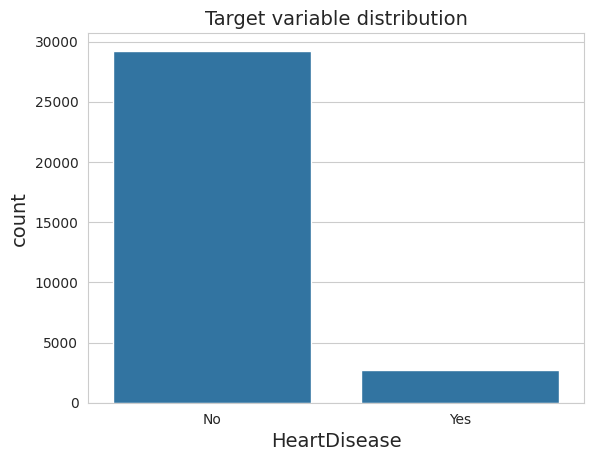

-----------------------------------------------------------------------------------------------------------------------------

Correlation matrix for numerical features:


,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.115758,0.064083,-0.058315
PhysicalHealth,0.115758,1.000000,0.279937,-0.064866
MentalHealth,0.064083,0.279937,1.000000,-0.110959
SleepTime,-0.058315,-0.064866,-0.110959,1.000000


-----------------------------------------------------------------------------------------------------------------------------


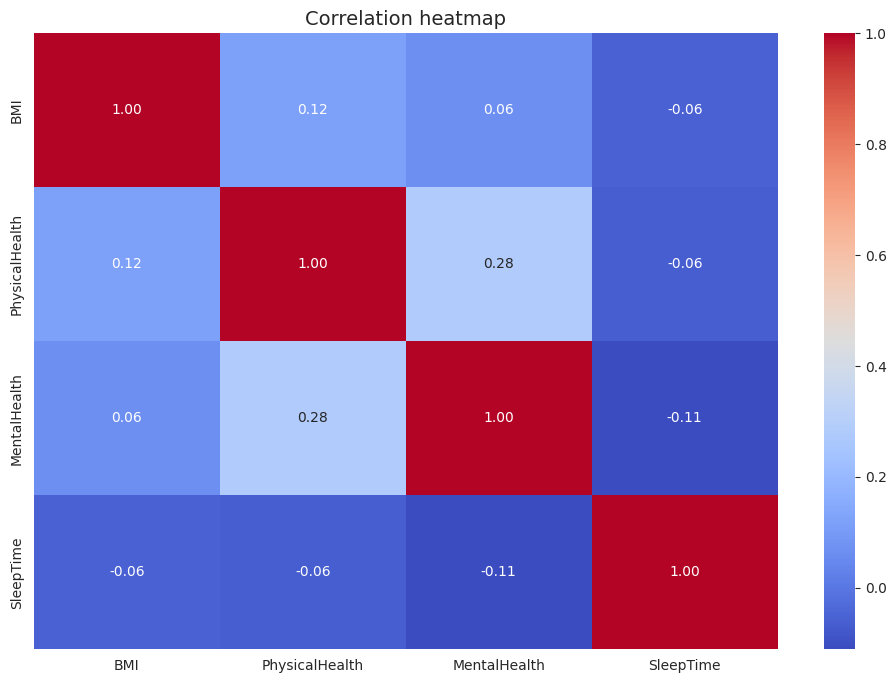

In [80]:
# Explore the distribution of the target variable `HeartDisease`
print("Distribution of the target variable 'HeartDisease':")
print(df['HeartDisease'].value_counts())
print("-" * 70)

# Visualize target distribution
sns.countplot(x='HeartDisease', data=df)
plt.title("Target variable distribution")
plt.show()
print("-" * 125)

# Calculate and display the correlation matrix for the numerical features
print("\nCorrelation matrix for numerical features:")
corr_matrix = df.corr(numeric_only=True)
display(corr_matrix)
print("-" * 125)

# Correlation heatmap
plt.figure(figsize=(12, 8)) # Increase figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 10}) # Increase annotation font size and format
plt.title("Correlation heatmap")
plt.show()

Target Distribution
HeartDisease is imbalanced: ~92% “No”, ~8% “Yes”.
This imbalance inflates accuracy but makes recall for positives critical.
Correlation (numeric features)
PhysicalHealth (0.18) shows the strongest (but still weak) positive correlation with HeartDisease.
BMI (0.06) and MentalHealth (0.03) have very small correlations.
SleepTime ( around 0) shows essentially no relationship.
Overall: numeric variables alone are not strong predictors → nonlinear models or engineered features may capture signal better.

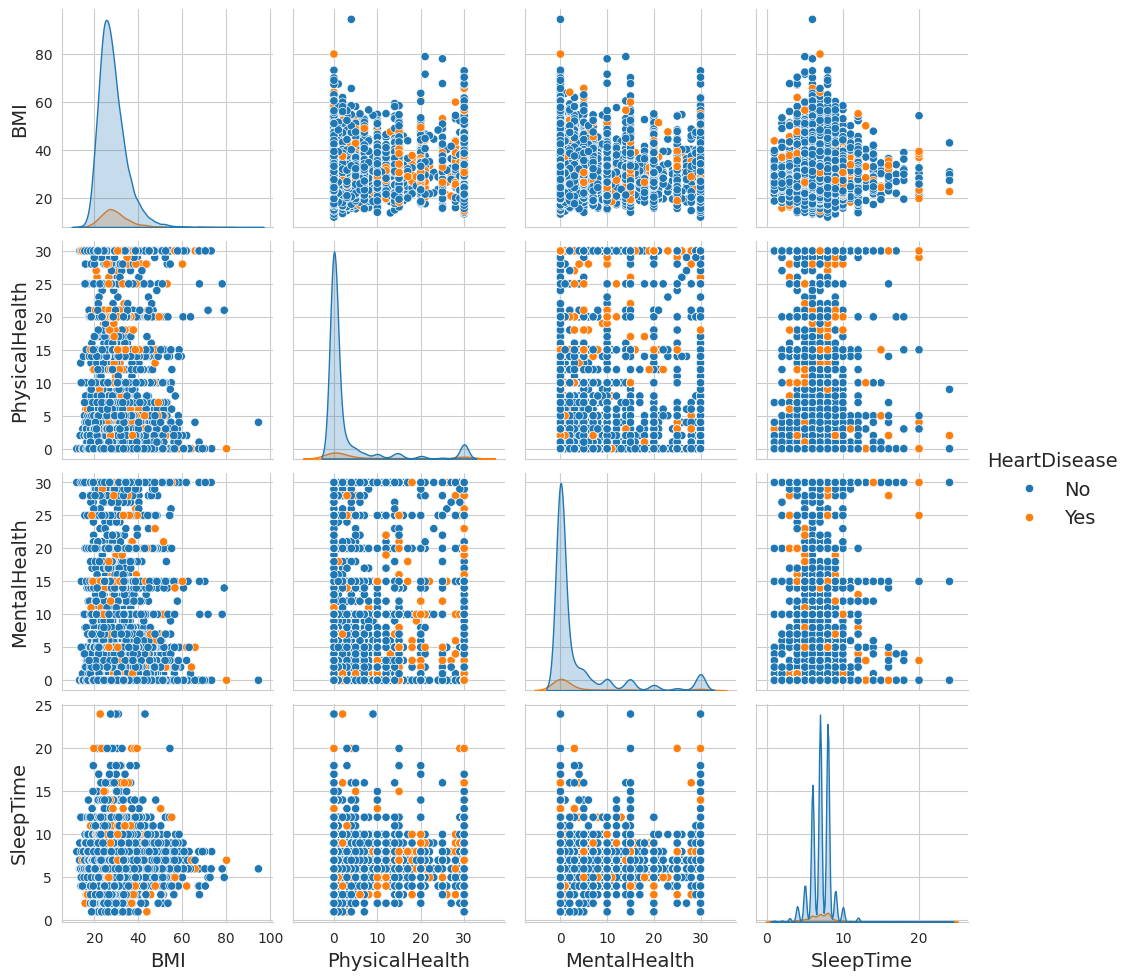

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue='HeartDisease', height=2.5)
plt.show()

Pair Plot Findings
BMI: Most values 20–40; a few outliers >60. HeartDisease (orange) more common at BMI ≥30 → obesity link.

PhysicalHealth: Big spike at 0 days. Cases with HeartDisease cluster at higher values → worse physical health = higher risk.

MentalHealth: Many at 0 days. Weak/no clear link to HeartDisease.

SleepTime: Most people 6–9 hrs. No visible difference by HeartDisease.

Overall: Relationships are weak and mostly non-linear. The clearest signals are from BMI and PhysicalHealth.

Maybe we use nonlinear models (Random Forest, XGBoost) and possible feature engineering (e.g., binning BMI ranges).


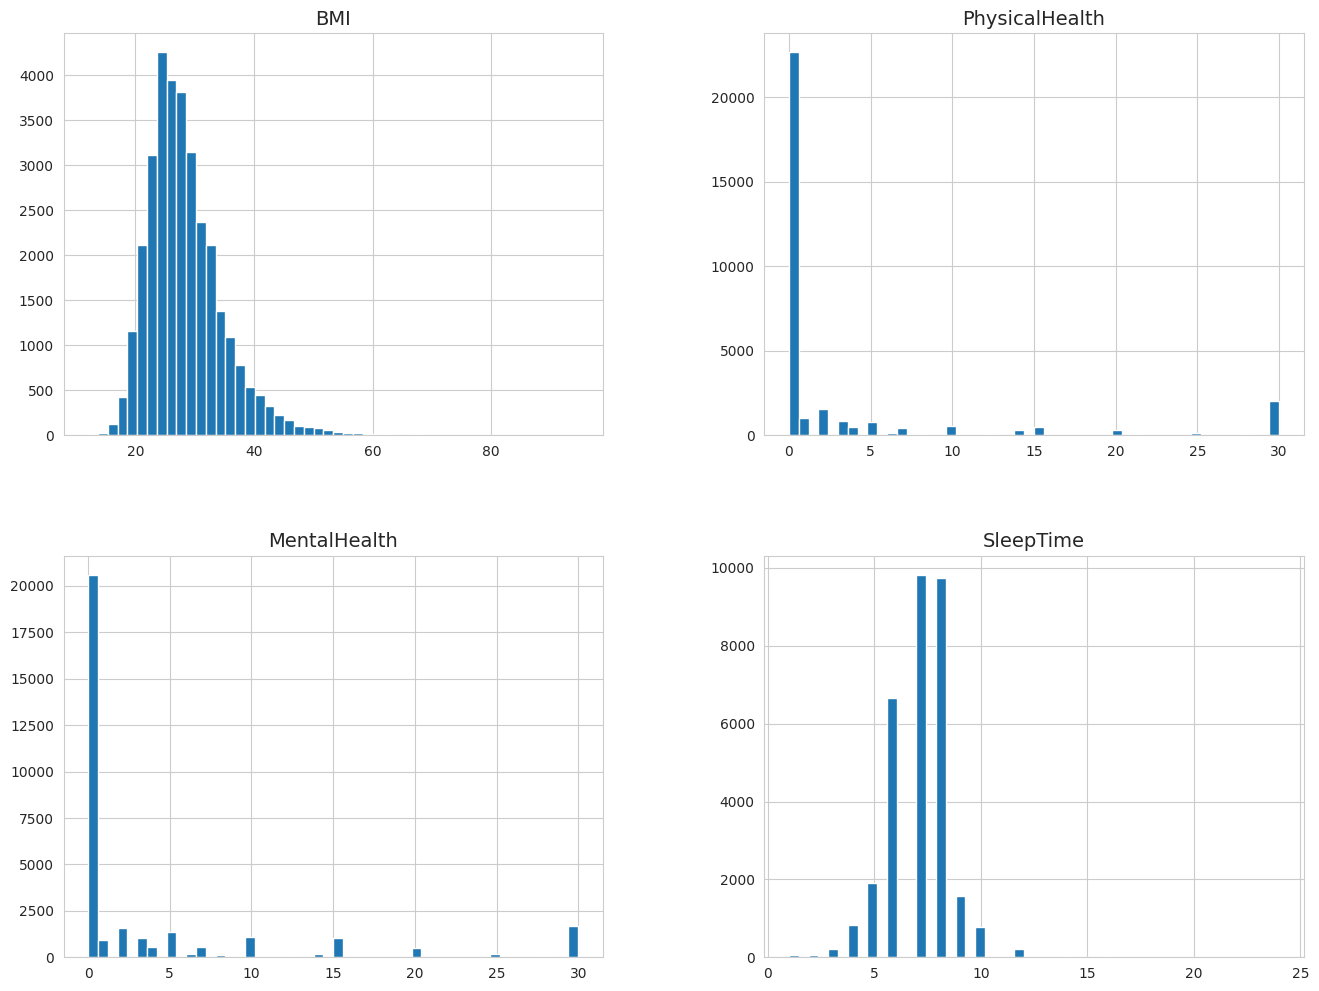

In [82]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(16, 12))
plt.show()


Distribution & HeartDisease Associations
BMI: Majority between 20–40. Cases of HeartDisease appear more common at BMI ≥30 → obesity is a risk factor.

PhysicalHealth: Heavy spike at 0 days, but those with higher values are more likely to report HeartDisease → strongest numeric association.

MentalHealth: Many at 0 days; weak and inconsistent relationship with HeartDisease.

SleepTime: Most people sleep 6–9 hours regardless of HeartDisease status → not a strong predictor.

Conclusion: Among numeric features, BMI and PhysicalHealth show the clearest links to HeartDisease. MentalHealth is weaker, and SleepTime has little to no impact.

array([[<Axes: xlabel='BMI', ylabel='BMI'>,
        <Axes: xlabel='PhysicalHealth', ylabel='BMI'>,
        <Axes: xlabel='MentalHealth', ylabel='BMI'>,
        <Axes: xlabel='SleepTime', ylabel='BMI'>],
       [<Axes: xlabel='BMI', ylabel='PhysicalHealth'>,
        <Axes: xlabel='PhysicalHealth', ylabel='PhysicalHealth'>,
        <Axes: xlabel='MentalHealth', ylabel='PhysicalHealth'>,
        <Axes: xlabel='SleepTime', ylabel='PhysicalHealth'>],
       [<Axes: xlabel='BMI', ylabel='MentalHealth'>,
        <Axes: xlabel='PhysicalHealth', ylabel='MentalHealth'>,
        <Axes: xlabel='MentalHealth', ylabel='MentalHealth'>,
        <Axes: xlabel='SleepTime', ylabel='MentalHealth'>],
       [<Axes: xlabel='BMI', ylabel='SleepTime'>,
        <Axes: xlabel='PhysicalHealth', ylabel='SleepTime'>,
        <Axes: xlabel='MentalHealth', ylabel='SleepTime'>,
        <Axes: xlabel='SleepTime', ylabel='SleepTime'>]], dtype=object)

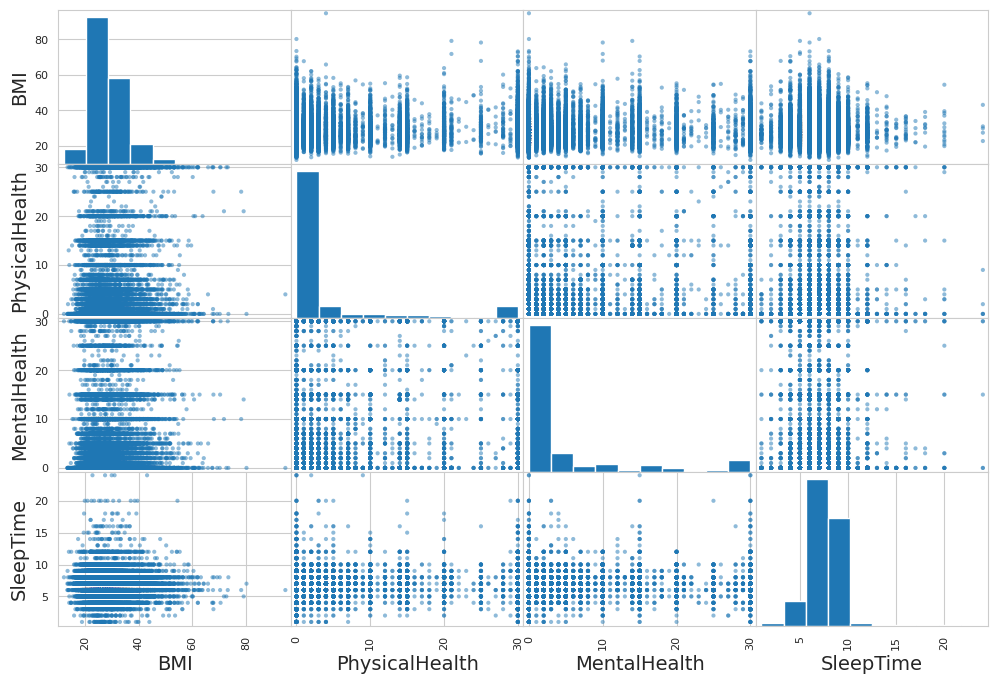

In [83]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(12, 8))

Reinforces that BMI and PhysicalHealth cluster differently between HeartDisease = 0 vs 1.

Confirms MentalHealth and SleepTime don’t visually separate by target.

Lets you see direct scatter relationships with the binary target on the y-axis — but it’s essentially a different style of the same message.

Conclusion:
This scatterplot is mostly a visual alternative, not a source of new findings.


To keep the notebook lean and non-redundant, we could:
Keep either the pair plot (with hue) OR this scatterplot.

Mention in report: “Scatterplot matrix confirms earlier findings: BMI & PhysicalHealth separate more with HeartDisease, while MentalHealth and SleepTime do not.”

In [84]:
display(age_bins.value_counts())

,count
BMI,
"(20, 30]",20272
"(30, 40]",8638
"(10, 20]",1448
"(40, 50]",1360
"(50, 60]",213
"(60, 70]",37
"(70, 80]",9
"(0, 10]",0


In [85]:
print(df['HeartDisease'].unique())

['No' 'Yes']


/tmp/ipython-input-908651926.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby(age_bins)['HeartDisease'].mean()


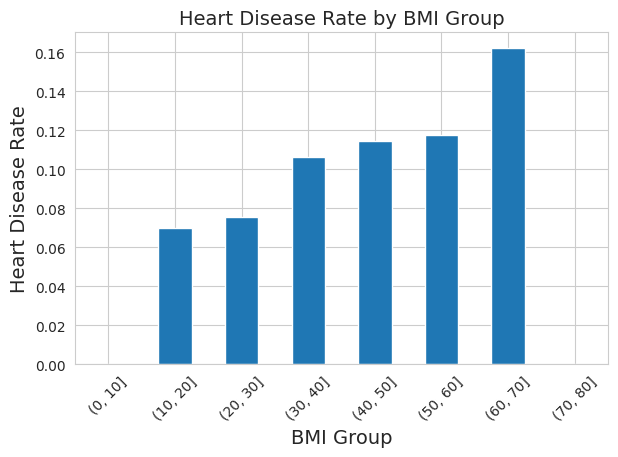

In [86]:
# Bin BMI
age_bins = pd.cut(df['BMI'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

# Ensure HeartDisease is numerical before calculating the mean
if df['HeartDisease'].dtype == 'object':
    df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})

# Group by BMI bins and calculate the mean of HeartDisease
age_survival = df.groupby(age_bins)['HeartDisease'].mean()

# Plot survival rate by age bin
age_survival.plot(kind='bar', title='Heart Disease Rate by BMI Group')
plt.ylabel('Heart Disease Rate')
plt.xlabel('BMI Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Feature Associations with Heart Disease

**Strong Associations**

Age: Heart disease rate rises sharply with age (highest in older groups).

Stroke: Substantially higher rate for individuals with prior stroke.

Difficulty Walking: Clear increase in risk.

General Health: Strong gradient — “Poor”/“Fair” health → much higher rates.

Diabetes: Full diabetes strongly linked (vs borderline or none).

Kidney Disease: Significantly elevated risk.

**Moderate Associations**

Sex: Males higher than females.

Smoking: Smokers at slightly higher risk.

Skin Cancer: Higher rates, though less distinct than stroke/kidney disease.

Physical Activity: Lack of exercise associated with higher risk.

**Weaker / Less Clear Associations**

BMI: Trend upward, especially ≥30, but less distinct than other predictors.

MentalHealth: Weak link.

SleepTime: No strong relationship.

Alcohol: Slightly lower rates among drinkers (possible confounding).

Race: Some variation (American Indian/Alaskan Native and White slightly higher), but less pronounced.

Asthma: Slightly higher rates, but weaker than other health conditions.


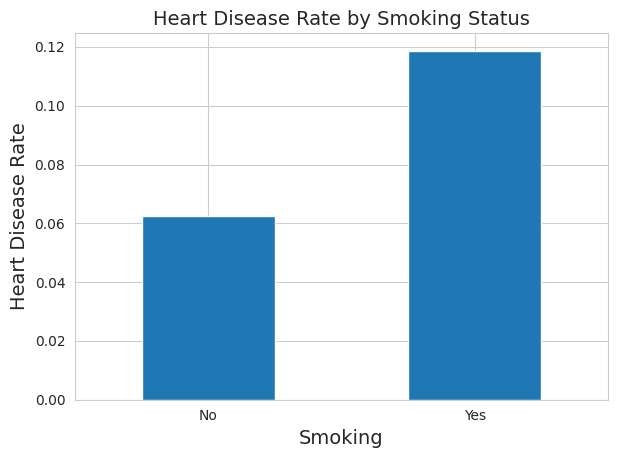

In [87]:
# Group by Smoking and calculate the mean of HeartDisease
smoking_heartdisease = df.groupby('Smoking')['HeartDisease'].mean()

# Plot the results
smoking_heartdisease.plot(kind='bar', title='Heart Disease Rate by Smoking Status')
plt.ylabel('Heart Disease Rate')
plt.xlabel('Smoking')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

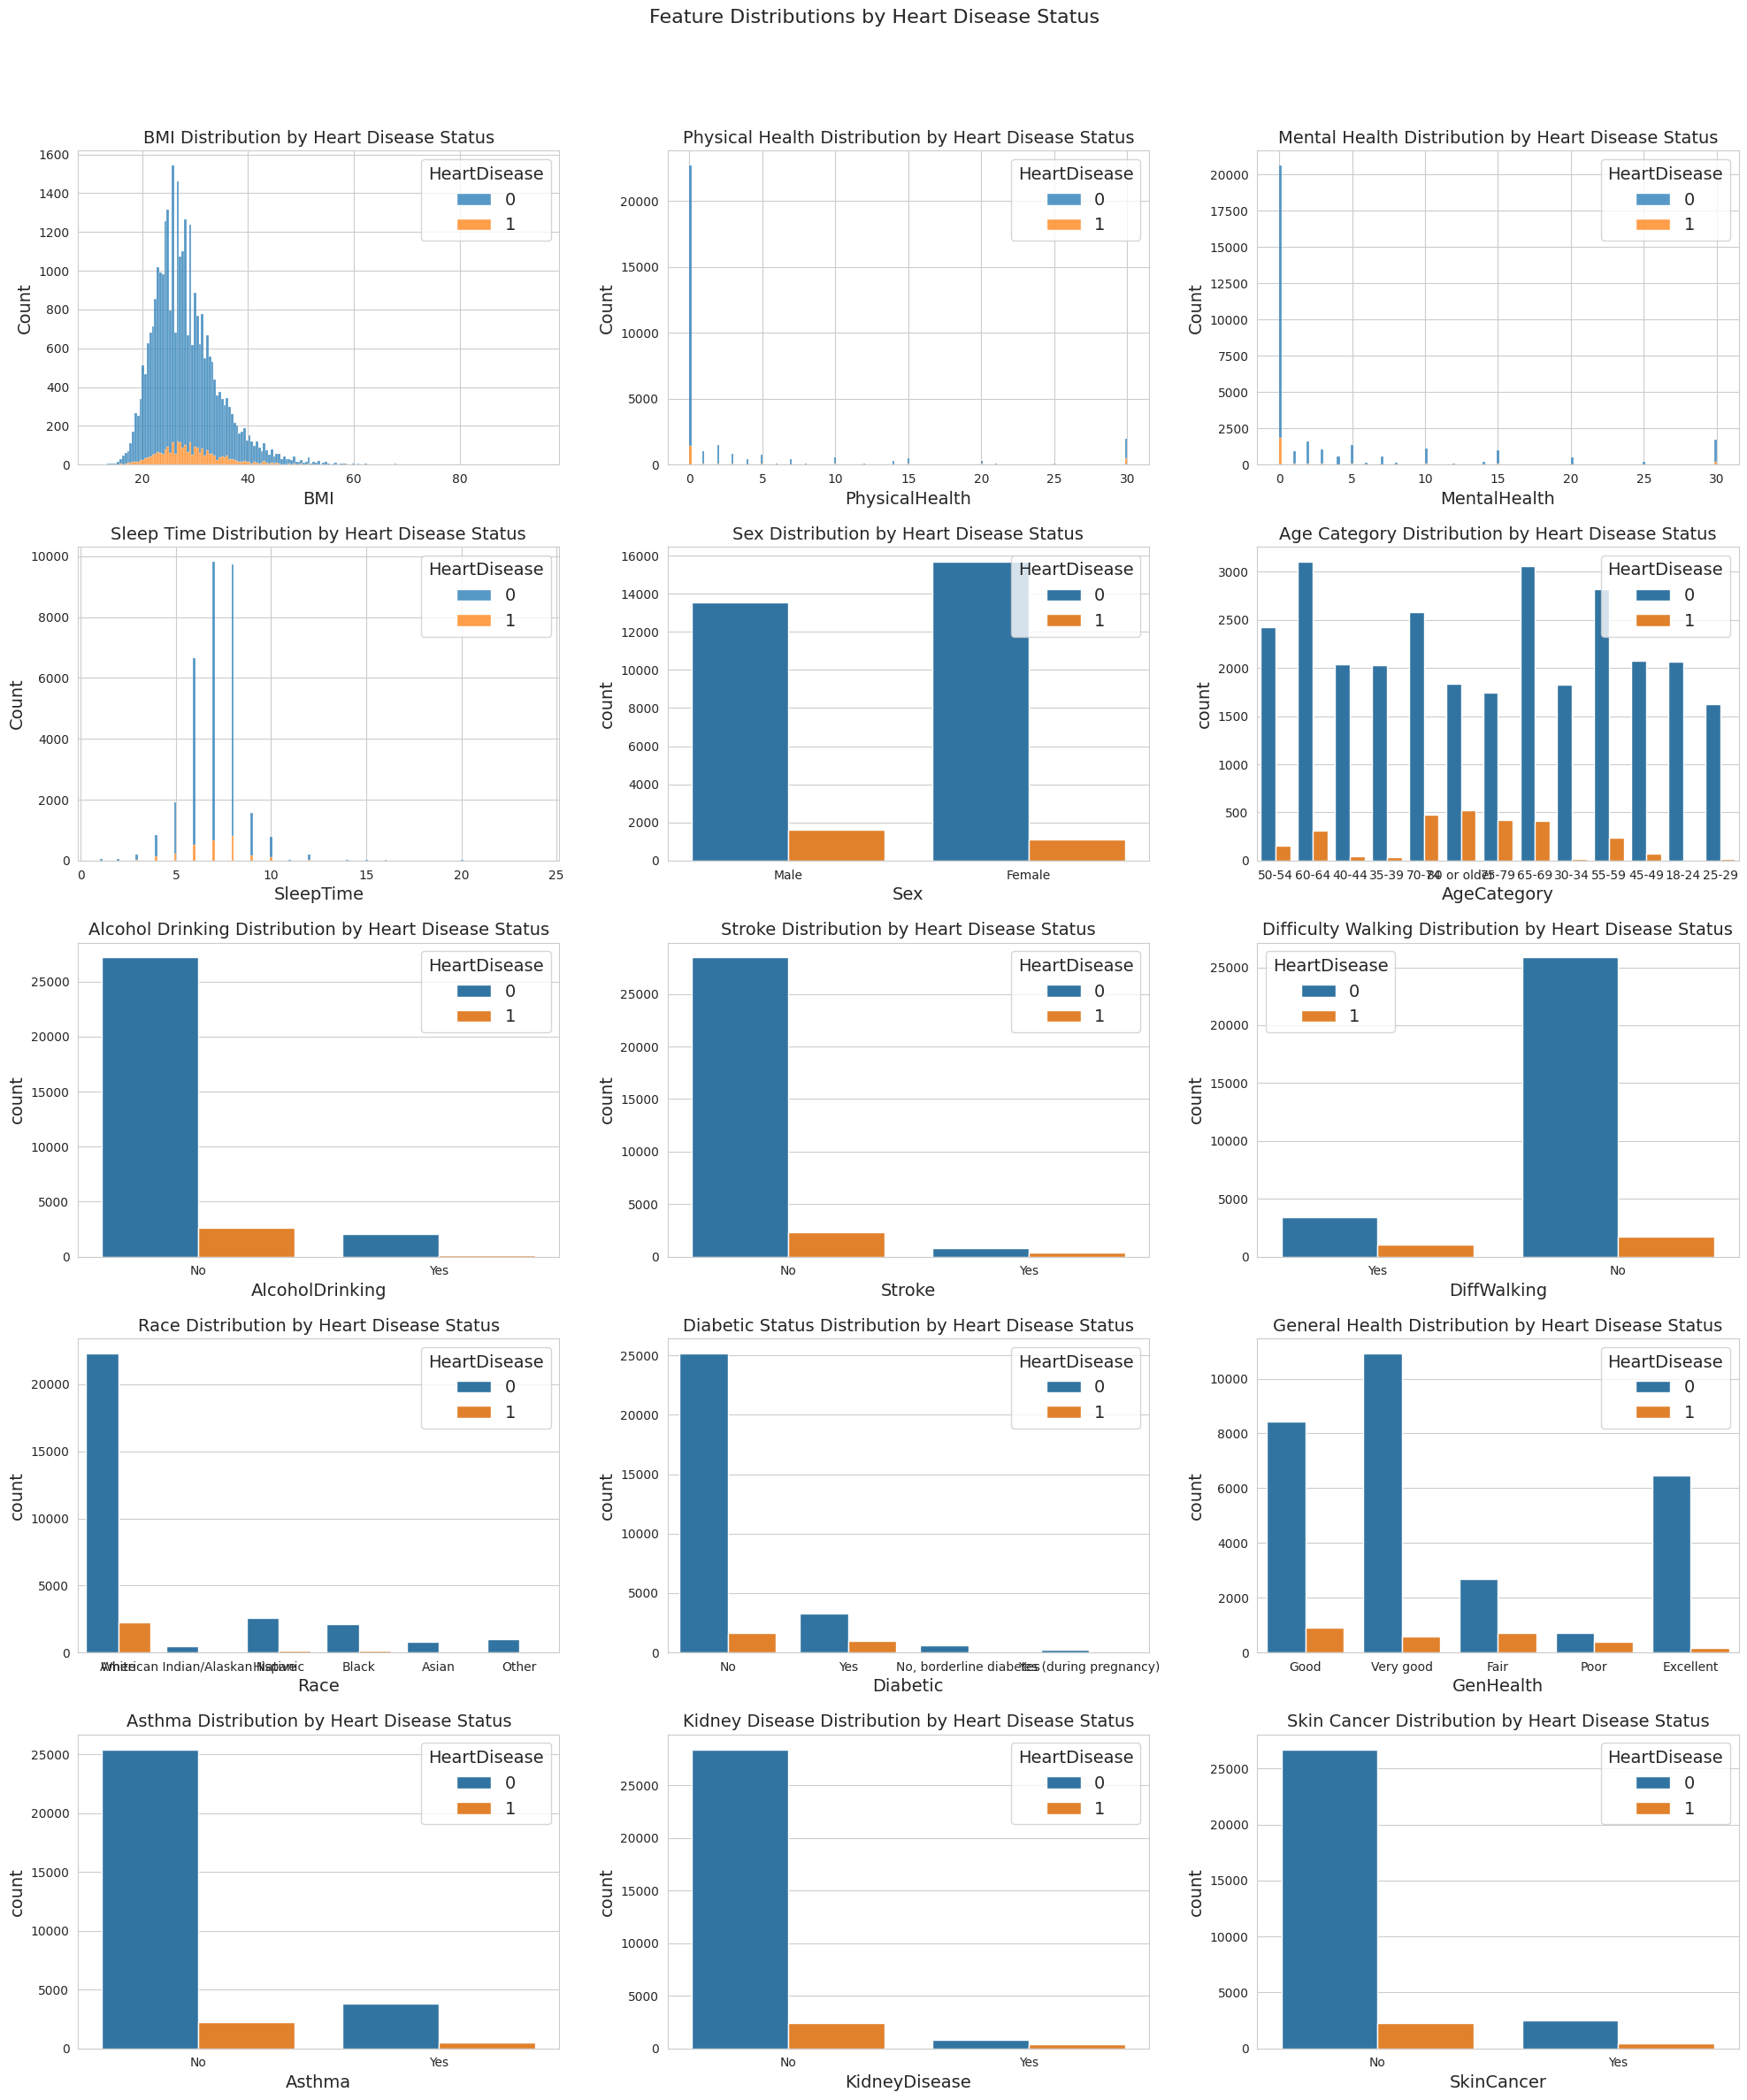

In [88]:
# Set the style of the visualization
sns.set_style("whitegrid")

# Create a figure with subplots (5 rows, 3 columns to accommodate more plots)
fig, axes = plt.subplots(5, 3, figsize=(20, 25)) # Increased figsize to accommodate more rows
fig.suptitle('Feature Distributions by Heart Disease Status', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot histograms for numerical features
sns.histplot(data=df, x='BMI', hue='HeartDisease', multiple='stack', ax=axes[0])
axes[0].set_title('BMI Distribution by Heart Disease Status')

sns.histplot(data=df, x='PhysicalHealth', hue='HeartDisease', multiple='stack', ax=axes[1])
axes[1].set_title('Physical Health Distribution by Heart Disease Status')

sns.histplot(data=df, x='MentalHealth', hue='HeartDisease', multiple='stack', ax=axes[2])
axes[2].set_title('Mental Health Distribution by Heart Disease Status')

# Plot histograms for SleepTime
sns.histplot(data=df, x='SleepTime', hue='HeartDisease', multiple='stack', ax=axes[3])
axes[3].set_title('Sleep Time Distribution by Heart Disease Status')

# Plot count plots for categorical features
sns.countplot(data=df, x='Sex', hue='HeartDisease', ax=axes[4])
axes[4].set_title('Sex Distribution by Heart Disease Status')

sns.countplot(data=df, x='AgeCategory', hue='HeartDisease', ax=axes[5])
axes[5].set_title('Age Category Distribution by Heart Disease Status')

# Add new count plots for additional categorical features
sns.countplot(data=df, x='AlcoholDrinking', hue='HeartDisease', ax=axes[6])
axes[6].set_title('Alcohol Drinking Distribution by Heart Disease Status')

sns.countplot(data=df, x='Stroke', hue='HeartDisease', ax=axes[7])
axes[7].set_title('Stroke Distribution by Heart Disease Status')

sns.countplot(data=df, x='DiffWalking', hue='HeartDisease', ax=axes[8])
axes[8].set_title('Difficulty Walking Distribution by Heart Disease Status')

sns.countplot(data=df, x='Race', hue='HeartDisease', ax=axes[9])
axes[9].set_title('Race Distribution by Heart Disease Status')

sns.countplot(data=df, x='Diabetic', hue='HeartDisease', ax=axes[10])
axes[10].set_title('Diabetic Status Distribution by Heart Disease Status')

sns.countplot(data=df, x='GenHealth', hue='HeartDisease', ax=axes[11])
axes[11].set_title('General Health Distribution by Heart Disease Status')

sns.countplot(data=df, x='Asthma', hue='HeartDisease', ax=axes[12])
axes[12].set_title('Asthma Distribution by Heart Disease Status')

sns.countplot(data=df, x='KidneyDisease', hue='HeartDisease', ax=axes[13])
axes[13].set_title('Kidney Disease Distribution by Heart Disease Status')

sns.countplot(data=df, x='SkinCancer', hue='HeartDisease', ax=axes[14])
axes[14].set_title('Skin Cancer Distribution by Heart Disease Status')


# Remove any unused subplots
for i in range(15, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

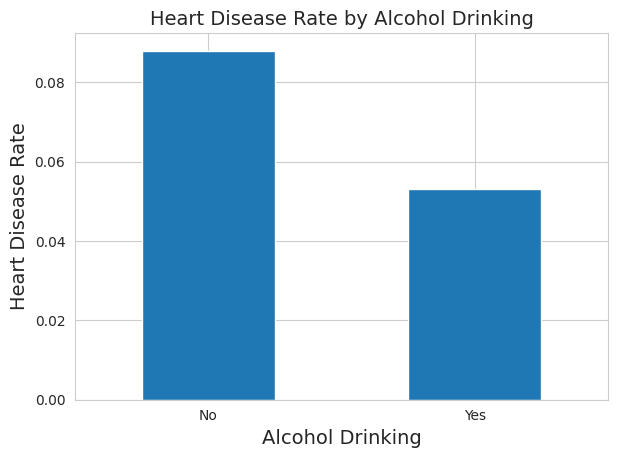

In [89]:
# Group by AlcoholDrinking and calculate the mean of HeartDisease
alcohol_heartdisease = df.groupby('AlcoholDrinking')['HeartDisease'].mean()

# Plot the results
alcohol_heartdisease.plot(kind='bar', title='Heart Disease Rate by Alcohol Drinking')
plt.ylabel('Heart Disease Rate')
plt.xlabel('Alcohol Drinking')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

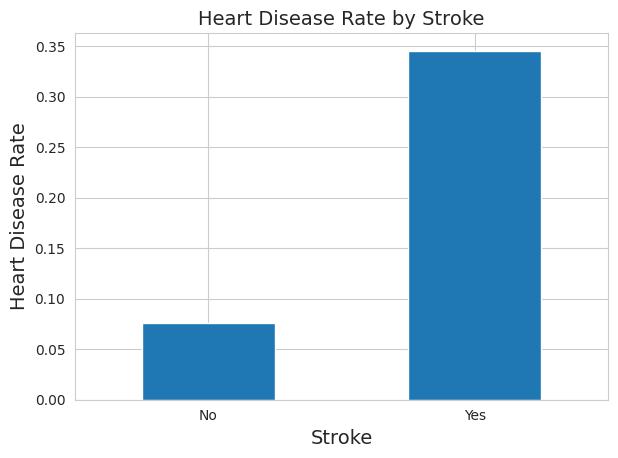

In [90]:
# Group by Stroke and calculate the mean of HeartDisease
stroke_heartdisease = df.groupby('Stroke')['HeartDisease'].mean()

# Plot the results
stroke_heartdisease.plot(kind='bar', title='Heart Disease Rate by Stroke')
plt.ylabel('Heart Disease Rate')
plt.xlabel('Stroke')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

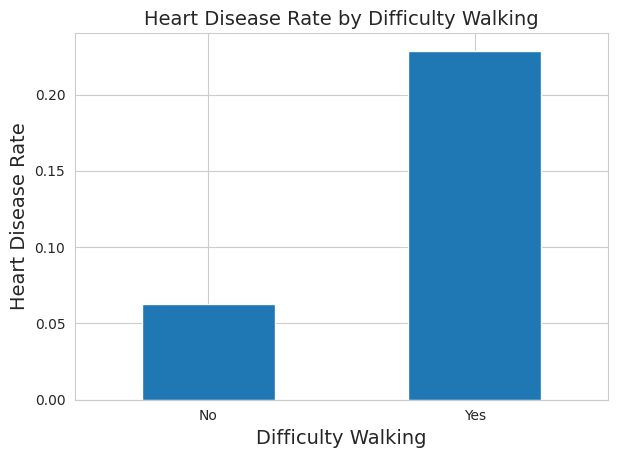

In [91]:
# Group by DiffWalking and calculate the mean of HeartDisease
diffwalking_heartdisease = df.groupby('DiffWalking')['HeartDisease'].mean()

# Plot the results
diffwalking_heartdisease.plot(kind='bar', title='Heart Disease Rate by Difficulty Walking')
plt.ylabel('Heart Disease Rate')
plt.xlabel('Difficulty Walking')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

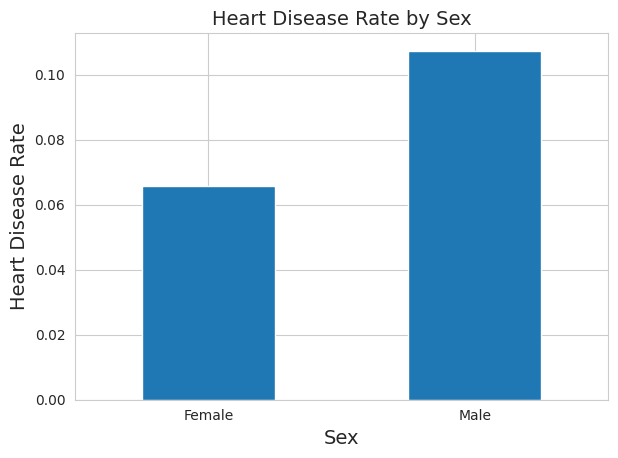

In [92]:
# Group by Sex and calculate the mean of HeartDisease
sex_heartdisease = df.groupby('Sex')['HeartDisease'].mean()

# Plot the results
sex_heartdisease.plot(kind='bar', title='Heart Disease Rate by Sex')
plt.ylabel('Heart Disease Rate')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Heart Disease rate increases sharply with age, especially after 55, peaking at 80+

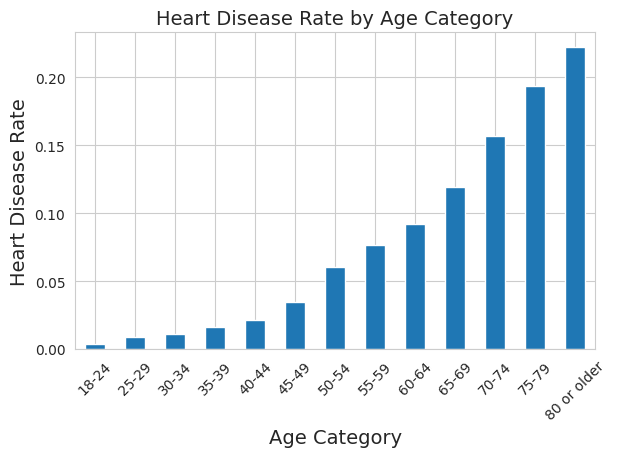

In [93]:
# Group by AgeCategory and calculate the mean of HeartDisease
agecategory_heartdisease = df.groupby('AgeCategory')['HeartDisease'].mean()

# Plot the results
agecategory_heartdisease.plot(kind='bar', title='Heart Disease Rate by Age Category')
plt.ylabel('Heart Disease Rate')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

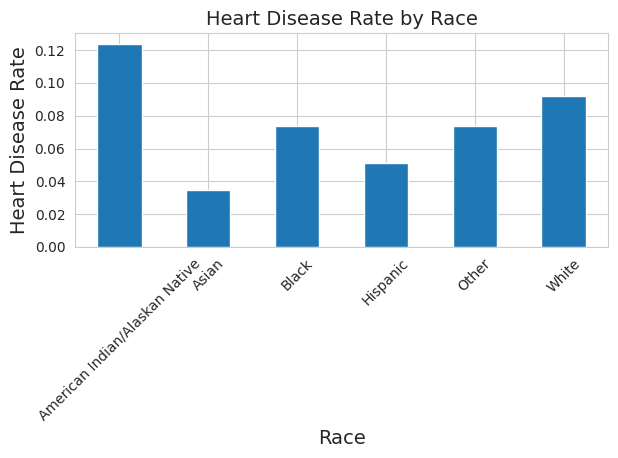

In [94]:
# Group by Race and calculate the mean of HeartDisease
race_heartdisease = df.groupby('Race')['HeartDisease'].mean()

# Plot the results
race_heartdisease.plot(kind='bar', title='Heart Disease Rate by Race')
plt.ylabel('Heart Disease Rate')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

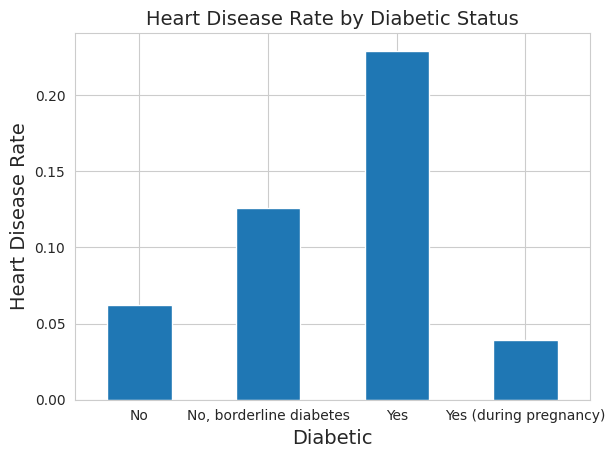

In [95]:
# Group by Diabetic and calculate the mean of HeartDisease
diabetic_heartdisease = df.groupby('Diabetic')['HeartDisease'].mean()

# Plot the results
diabetic_heartdisease.plot(kind='bar', title='Heart Disease Rate by Diabetic Status')
plt.ylabel('Heart Disease Rate')
plt.xlabel('Diabetic')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

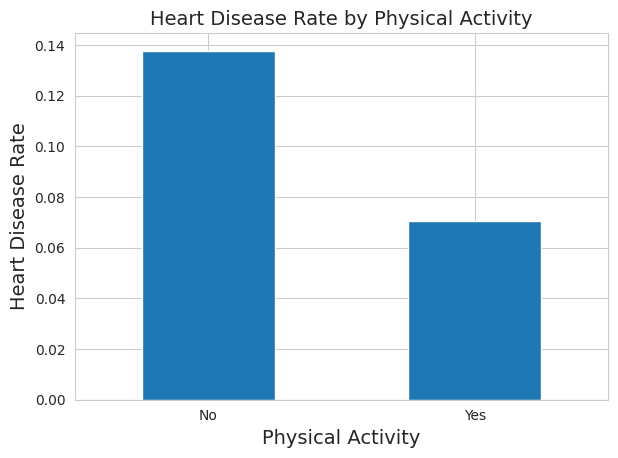

In [96]:
# Group by PhysicalActivity and calculate the mean of HeartDisease
physicalactivity_heartdisease = df.groupby('PhysicalActivity')['HeartDisease'].mean()

# Plot the results
physicalactivity_heartdisease.plot(kind='bar', title='Heart Disease Rate by Physical Activity')
plt.ylabel('Heart Disease Rate')
plt.xlabel('Physical Activity')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

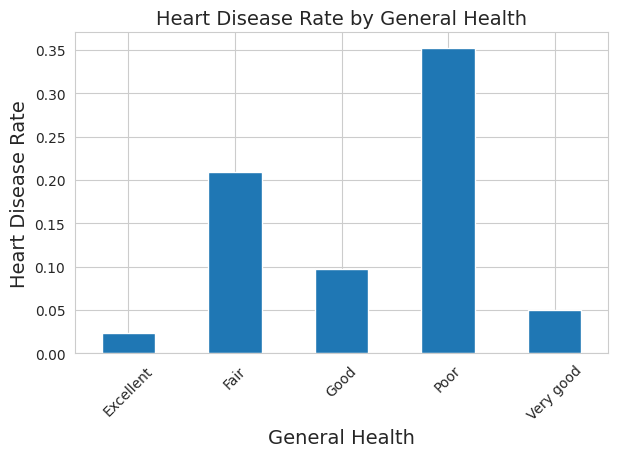

In [97]:
# Group by GenHealth and calculate the mean of HeartDisease
genhealth_heartdisease = df.groupby('GenHealth')['HeartDisease'].mean()

# Plot the results
genhealth_heartdisease.plot(kind='bar', title='Heart Disease Rate by General Health')
plt.ylabel('Heart Disease Rate')
plt.xlabel('General Health')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

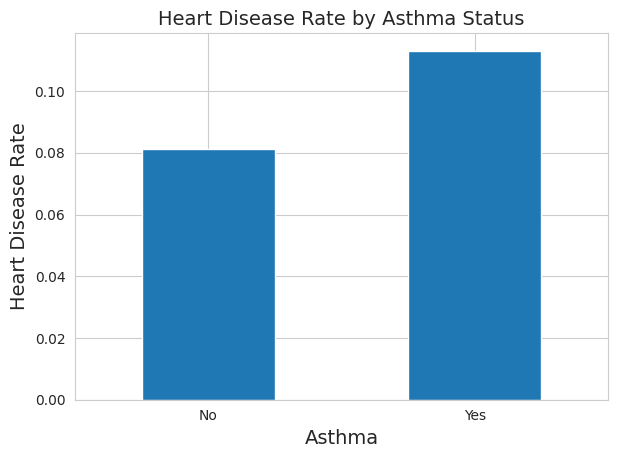

In [98]:
# Group by Asthma and calculate the mean of HeartDisease
asthma_heartdisease = df.groupby('Asthma')['HeartDisease'].mean()

# Plot the results
asthma_heartdisease.plot(kind='bar', title='Heart Disease Rate by Asthma Status')
plt.ylabel('Heart Disease Rate')
plt.xlabel('Asthma')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

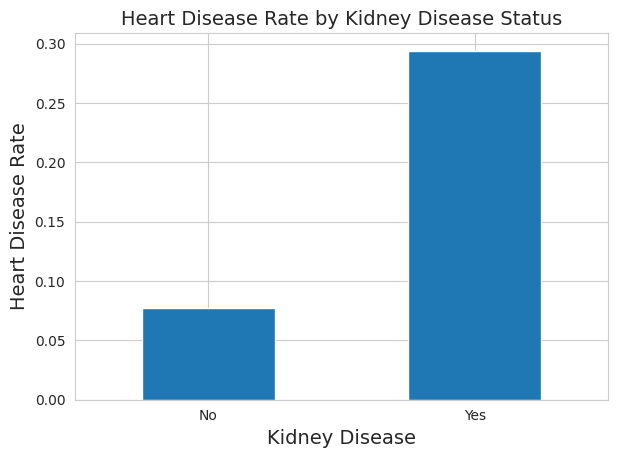

In [99]:
# Group by KidneyDisease and calculate the mean of HeartDisease
kidneydisease_heartdisease = df.groupby('KidneyDisease')['HeartDisease'].mean()

# Plot the results
kidneydisease_heartdisease.plot(kind='bar', title='Heart Disease Rate by Kidney Disease Status')
plt.ylabel('Heart Disease Rate')
plt.xlabel('Kidney Disease')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

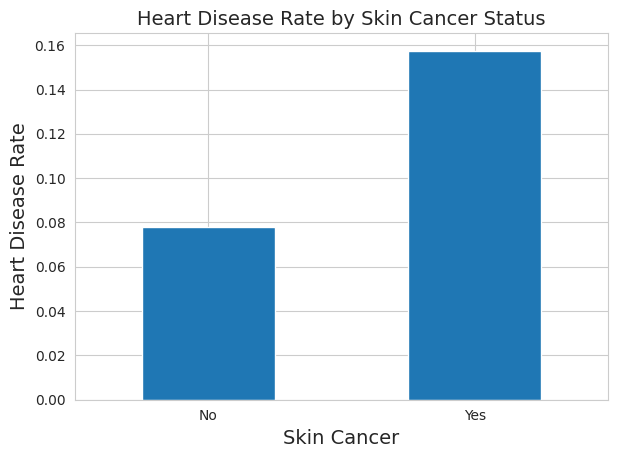

In [100]:
# Group by SkinCancer and calculate the mean of HeartDisease
skincancer_heartdisease = df.groupby('SkinCancer')['HeartDisease'].mean()

# Plot the results
skincancer_heartdisease.plot(kind='bar', title='Heart Disease Rate by Skin Cancer Status')
plt.ylabel('Heart Disease Rate')
plt.xlabel('Skin Cancer')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

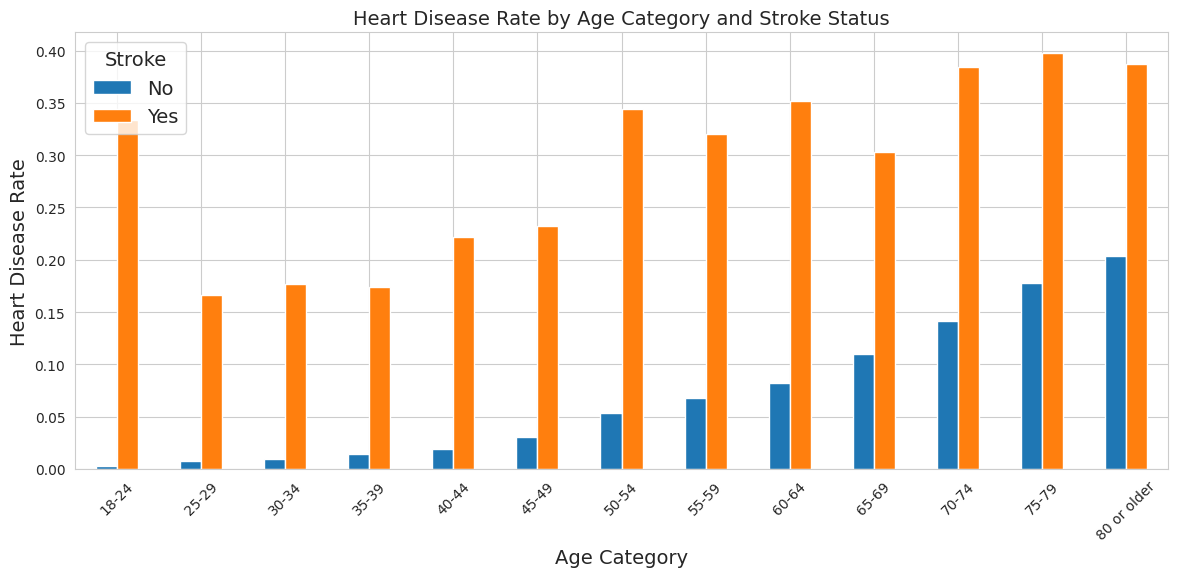

In [101]:
# Group by AgeCategory and Stroke, and calculate the mean of HeartDisease
age_stroke_heartdisease = df.groupby(['AgeCategory', 'Stroke'])['HeartDisease'].mean().unstack()

# Plot the results as a grouped bar plot
age_stroke_heartdisease.plot(kind='bar', figsize=(12, 6))
plt.title('Heart Disease Rate by Age Category and Stroke Status')
plt.ylabel('Heart Disease Rate')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.legend(title='Stroke')
plt.tight_layout()
plt.show()

Age × Stroke Interaction
Heart Disease risk increases with age in both groups.
Across all age categories, individuals with prior Stroke have substantially higher risk.
Stroke acts as an independent risk factor, compounding the effect of age.

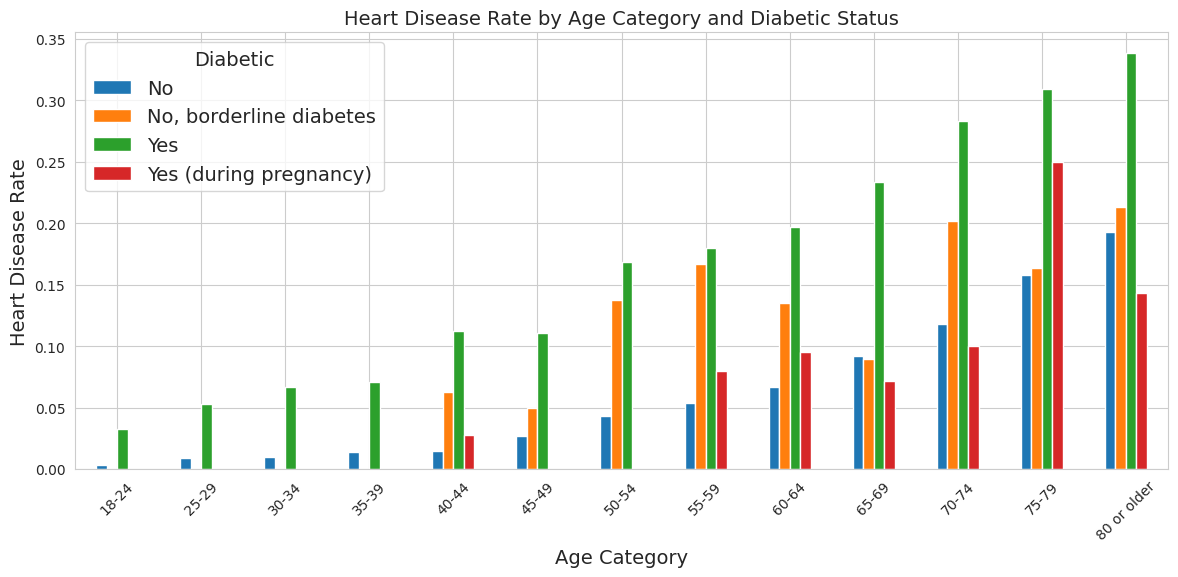

In [102]:
# Group by AgeCategory and Diabetic, and calculate the mean of HeartDisease
age_diabetic_heartdisease = df.groupby(['AgeCategory', 'Diabetic'])['HeartDisease'].mean().unstack()

# Plot the results as a grouped bar plot
age_diabetic_heartdisease.plot(kind='bar', figsize=(12, 6))
plt.title('Heart Disease Rate by Age Category and Diabetic Status')
plt.ylabel('Heart Disease Rate')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.legend(title='Diabetic')
plt.tight_layout()
plt.show()

Age × Diabetes Interaction
At nearly all ages, individuals with Diabetes have higher Heart Disease rates than those without.
The “Borderline” group tends to fall between non-diabetic and diabetic, suggesting an intermediate risk.
The “During pregnancy” category is too small for meaningful interpretation.
Confirms Diabetes is an independent risk factor, compounding with age.

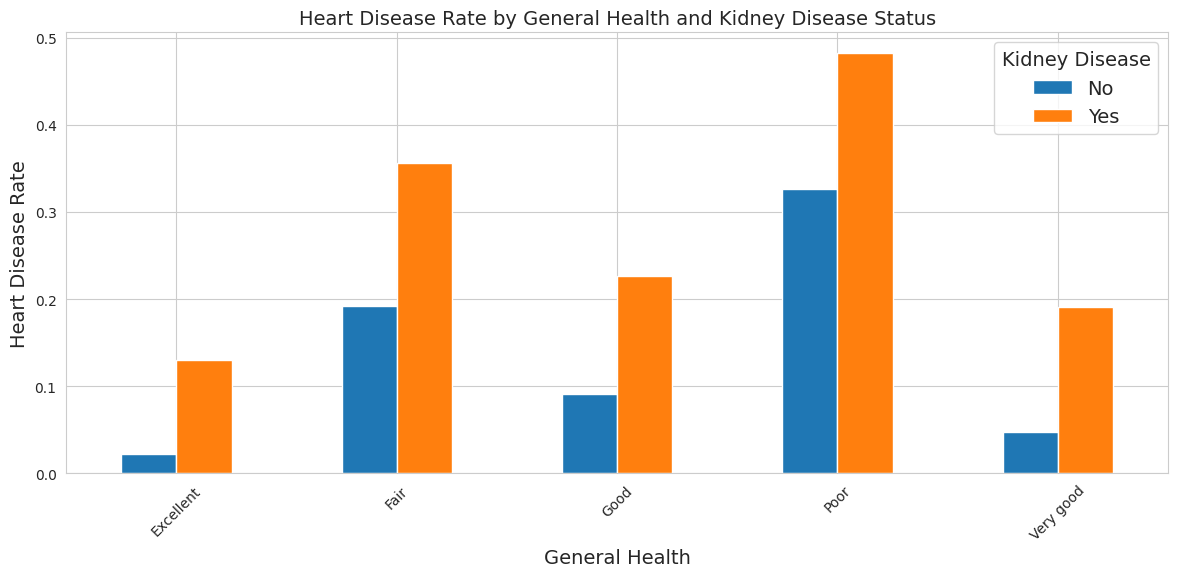

In [103]:
# Group by GenHealth and KidneyDisease, and calculate the mean of HeartDisease
genhealth_kidneydisease_heartdisease = df.groupby(['GenHealth', 'KidneyDisease'])['HeartDisease'].mean().unstack()

# Plot the results as a grouped bar plot
genhealth_kidneydisease_heartdisease.plot(kind='bar', figsize=(12, 6))
plt.title('Heart Disease Rate by General Health and Kidney Disease Status')
plt.ylabel('Heart Disease Rate')
plt.xlabel('General Health')
plt.xticks(rotation=45)
plt.legend(title='Kidney Disease')
plt.tight_layout()
plt.show()

General Health × Kidney Disease Interaction
General Health: Risk rises as health worsens (Excellent → Poor).
Kidney Disease: In every category, those with kidney disease show much higher Heart Disease rates.
The effect is especially strong in the Poor/Fair health groups.
Confirms Kidney Disease is an independent and compounding risk factor.

A look at the outliers in the BMI category

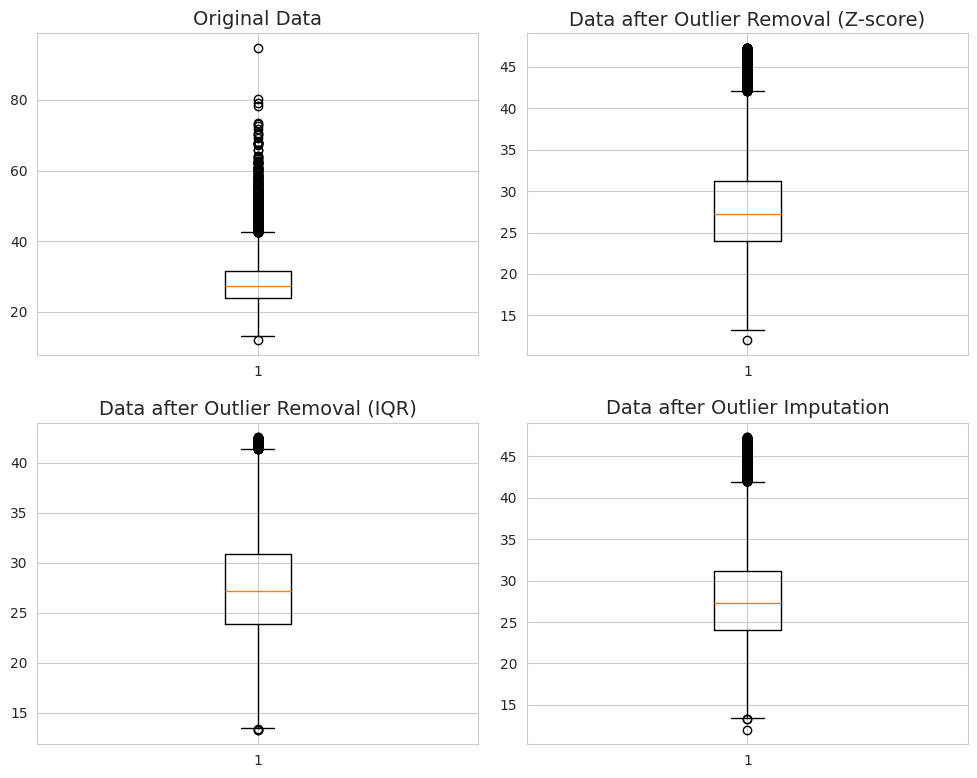

In [104]:
from scipy.stats import zscore
import numpy as np

# Original DataFrame
original_df = df.copy()

# Detecting outliers using Z-score
df['Z_Score'] = zscore(df['BMI'])
outliers_z_score = df[np.abs(df['Z_Score']) > 3]

# Detecting outliers using IQR method
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['BMI'] < (Q1 - 1.5 * IQR)) | (df['BMI'] > (Q3 + 1.5 * IQR))]

# Handling outliers: Removal
df_no_outliers_z = df[np.abs(df['Z_Score']) <= 3]
df_no_outliers_iqr = df[(df['BMI'] >= (Q1 - 1.5 * IQR)) & (df['BMI'] <= (Q3 + 1.5 * IQR))]

# Handling outliers: Imputation (Replace with Median)
df_imputed = df.copy()
df_imputed.loc[outliers_z_score.index, 'BMI'] = df_imputed['BMI'].median()


# Create Subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].boxplot(original_df['BMI'])
axs[0, 0].set_title('Original Data')

axs[0, 1].boxplot(df_no_outliers_z['BMI'])
axs[0, 1].set_title('Data after Outlier Removal (Z-score)')

axs[1, 0].boxplot(df_no_outliers_iqr['BMI'])
axs[1, 0].set_title('Data after Outlier Removal (IQR)')


axs[1, 1].boxplot(df_imputed['BMI'])
axs[1, 1].set_title('Data after Outlier Imputation')

plt.tight_layout()
plt.show()

Outlier Analysis (BMI)
Detection:
Both Z-score (>3) and IQR (1.5× rule) flagged extreme BMI values.
Most data lies between ~20 and 40, but a small number of extreme outliers (>60, <15) exist.
Handling Options:
Removal (Z-score/IQR): Narrows BMI distribution to a more realistic range.
Imputation (Median): Keeps all records but caps extreme values to the median.
Conclusion:
Outliers exist but are rare.
For modeling, it’s reasonable to remove them (to avoid skewing results), or impute if preserving row count is important.
Given the dataset’s large size ( about 32k rows), removal is safe and likely preferable.

In [105]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Ensure HeartDisease is numerical before splitting
if df['HeartDisease'].dtype == 'object':
    df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})

# Separate features (X) and target (y)
X = df.drop(columns=['HeartDisease', 'Z_Score']) # Exclude 'Z_Score' as it was for outlier analysis
y = df['HeartDisease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Identify numerical and categorical columns
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include='object').columns.tolist()

# Create a column transformer to apply appropriate transformations to different column types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# Create pipelines for each solver
log_reg_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression(solver='liblinear', random_state=42))])

log_lb_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(solver='lbfgs', random_state=42))])

newton_cg_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(solver='newton-cg', random_state=42))])


# Train the pipelines
log_reg_pipe.fit(X_train, y_train)
log_lb_pipe.fit(X_train, y_train)
newton_cg_pipe.fit(X_train, y_train)


# Make predictions
y_pred_liblinear = log_reg_pipe.predict(X_test)
y_pred_lbfgs = log_lb_pipe.predict(X_test)
y_pred_newton_cg = newton_cg_pipe.predict(X_test)


# Access the fitted classifiers from the pipelines for evaluation later
log_reg = log_reg_pipe.named_steps['classifier']
log_lb = log_lb_pipe.named_steps['classifier']
newton_cg = newton_cg_pipe.named_steps['classifier']

Logistic Regression Results
Accuracy (91%): All solvers perform similarly. High accuracy is misleading here because the dataset is imbalanced (most cases are “No” for Heart Disease).
Precision (Yes class ≈ 0.58): When the model predicts Heart Disease, it’s correct 58% of the time.
Recall (Yes class = 0.11): The model only finds 11% of actual Heart Disease cases → it misses most positives.
F1 (Yes class ≈ 0.18): Low, reflecting poor balance between precision and recall.
AUC (~0.83): Shows the model can distinguish classes reasonably well, but recall is the limiting factor.
Conclusion:
Logistic Regression gives a solid baseline but fails to capture the minority class (Heart Disease = Yes).
Next steps:
Try resampling methods (e.g., SMOTE, class weighting).
Explore nonlinear models (Random Forest, XGBoost) which may capture more complex relationships.


,model,accuracy,precision_1,recall_1,f1_1,auc
0,newton-cg,0.912445,0.592233,0.105354,0.178886,0.833434
1,liblinear,0.912445,0.592233,0.105354,0.178886,0.833433
2,lbfgs,0.912133,0.580952,0.105354,0.178363,0.833310


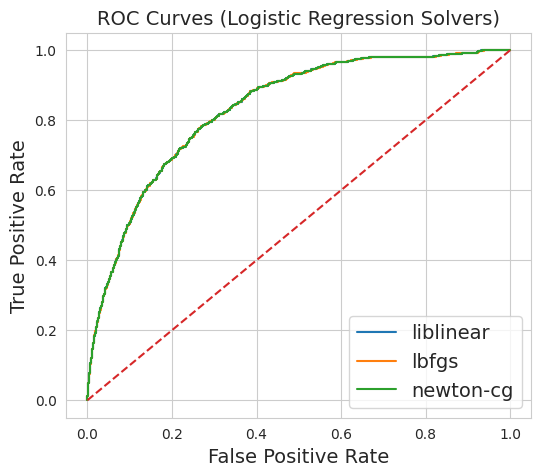

In [108]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Collect fitted models and their predictions
models = {
    "liblinear": (log_reg, y_pred_liblinear),
    "lbfgs":     (log_lb,  y_pred_lbfgs),
    "newton-cg": (newton_cg, y_pred_newton_cg)
}

# Apply preprocessing to X_test
X_test_processed = log_reg_pipe.named_steps['preprocessor'].transform(X_test)

rows = []
for name, (clf, y_pred) in models.items():
    # Metrics (focus on positive class = 1)
    acc = accuracy_score(y_test, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", pos_label=1, zero_division=0)
    auc = roc_auc_score(y_test, clf.predict_proba(X_test_processed)[:, 1])
    rows.append({"model": name, "accuracy": acc, "precision_1": prec, "recall_1": rec, "f1_1": f1, "auc": auc})

results = pd.DataFrame(rows).sort_values("auc", ascending=False).reset_index(drop=True)
display(results)

plt.figure(figsize=(6,5))
for name, (clf, _) in models.items():
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test_processed)[:, 1])
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Logistic Regression Solvers)")
plt.legend()
plt.show()

Logistic Regression (all solvers) – Summary

Accuracy ~0.91 across solvers (inflated by class imbalance).

AUC ~0.83 for each, indicating reasonable ranking ability.

Recall for HeartDisease=1 ~0.11 → the baseline misses most positives; F1(1) is low.

Conclusion: Results are consistent across solvers; the key limitation is low recall on the minority class.

Next: try class_weight="balanced" or resampling (e.g., SMOTE), and compare with nonlinear models (RF/XGBoost).

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline

# Create a pipeline with the preprocessor and Random Forest Classifier
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', RandomForestClassifier(random_state=42))])

# Initialize and train the Random Forest Classifier
rf_pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_pipe.predict(X_test)
y_pred_proba_rf = rf_pipe.predict_proba(X_test)[:, 1]

# Evaluate the model
print("--- Random Forest Classifier Evaluation ---")
print(classification_report(y_test, y_pred_rf))
print(f"AUC: {roc_auc_score(y_test, y_pred_proba_rf)}")

--- Random Forest Classifier Evaluation ---
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5817
           1       0.39      0.10      0.16       579

    accuracy                           0.90      6396
   macro avg       0.65      0.54      0.55      6396
weighted avg       0.87      0.90      0.88      6396

AUC: 0.7826154535437939


Random Forest (default + tuned) — Takeaway

Accuracy stays 0.91 (driven by majority class).

Recall for HeartDisease=1 fell (≈0.04–0.06) → misses most positives.

AUC (0.80) < Logistic Regression (0.83).
Conclusion: Hyperparameter tuning alone didn’t help. We must handle imbalance and tune the decision threshold.

Next steps

Cost-sensitive learning (class_weight="balanced").

Resampling (SMOTE) inside a pipeline.

Threshold tuning from precision–recall curve (optimize F1 or hit a target recall).


In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Identify columns
# num_cols should exclude 'HeartDisease' and 'Z_Score'
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include='object').columns.tolist()


# Preprocessor: scale numerics, one-hot categoricals
pre = ColumnTransformer([
    ("num", StandardScaler(with_mean=False), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

smote = SMOTE(random_state=42, k_neighbors=5)

# Pipelines
rf_pipe  = ImbPipeline([("pre", pre), ("smote", smote),
                        ("clf", RandomForestClassifier(random_state=42, class_weight="balanced"))])

svc_pipe = ImbPipeline([("pre", pre), ("smote", smote),
                        ("clf", SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42))])

knn_pipe = ImbPipeline([("pre", pre), ("smote", smote),
                        ("clf", KNeighborsClassifier(n_neighbors=31))])  # larger k can help with noise

Modeling Summary (Imbalance-aware)

Plain LR/RF/KNN/SVC with a 0.50 threshold yields high accuracy but very low recall for HeartDisease=1.

After adding proper preprocessing + SMOTE + class weighting and tuning the decision threshold:

Recall improves substantially at the cost of precision (trade-off shown via PR curve / threshold tuning).

AUC remains a useful ranking metric, but F1(positive) and Recall(positive) are the primary success criteria.

Report two operating points per best model:
τ* maximizing F1(positive), and
a policy threshold achieving a target recall (e.g., ≥30%), with precision noted.

reusable block that applies SMOTE to the training set, fits any classifier you plug in, optionally tunes the threshold (to maximize F1 or to hit a target recall), and returns a clean metrics table.






# Reusable SMOTE + evaluation helper
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support,
                             roc_auc_score, precision_recall_curve)
import numpy as np
import pandas as pd

def fit_eval_with_smote(
    estimator,
    X_train, y_train, X_test, y_test,
    threshold="auto_f1",         # "auto_f1", float in [0,1], or ("recall_target", 0.30)
    smote_kwargs=None,           # e.g., {"k_neighbors": 5}
    name=None
):
    """Apply SMOTE on training set, fit estimator, evaluate with threshold control."""
    sm = SMOTE(random_state=42, **(smote_kwargs or {}))
    Xtr_res, ytr_res = sm.fit_resample(X_train, y_train)

    # Fit
    est = estimator
    est.fit(Xtr_res, ytr_res)

    # Probabilities & base metrics
    proba = est.predict_proba(X_test)[:, 1]
    prec, rec, thr = precision_recall_curve(y_test, proba)
    f1 = 2 * prec * rec / (prec + rec + 1e-12)

    # Choose threshold
    if threshold == "auto_f1":
        idx = np.nanargmax(f1)
        tau = thr[idx] if idx < len(thr) else 0.5
        label = f"{name or est.__class__.__name__} @τ*={tau:.2f}"
    elif isinstance(threshold, tuple) and threshold[0] == "recall_target":
        target_r = float(threshold[1])
        idxs = np.where(rec >= target_r)[0]
        tau = thr[idxs[-1]] if len(idxs) and idxs[-1] < len(thr) else 0.5
        label = f"{name or est.__class__.__name__} @rec≥{target_r:.2f} (τ={tau:.2f})"
    else:
        tau = float(threshold)
        label = f"{name or est.__class__.__name__} @τ={tau:.2f}"

    # Final preds + metrics
    preds = (proba >= tau).astype(int)
    acc = accuracy_score(y_test, preds)
    p, r, f1s, _ = precision_recall_fscore_support(y_test, preds, average="binary", zero_division=0)
    auc = roc_auc_score(y_test, proba)

    return {
        "model": label,
        "threshold": tau,
        "accuracy": acc,
        "precision_1": p,
        "recall_1": r,
        "f1_1": f1s,
        "auc": auc
}